## Setting up

In [1]:
# Import libraries
import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression as Lin_Reg
from sklearn.metrics import mean_squared_error
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.cm as cmx
import matplotlib.colors as colors
import scipy as sp
from sklearn.linear_model import RidgeCV, Ridge, LassoCV, LassoLars, LassoLarsCV, Lasso, ElasticNet, ElasticNetCV, BayesianRidge
from keras.models import Sequential
from keras.layers import Dense
from keras.constraints import max_norm
%matplotlib inline

np.random.seed(13)

from collections import Counter

/Users/hurlink/anaconda3/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [2]:
# Load training and test sets (assumes you have these in current working directory)
train = pd.read_csv("train.csv")
test = pd.read_csv("test.csv")

In [3]:
# Inspect training set
train.head()

,Id,Feat 1,Feat 2,Feat 3,Feat 4,Feat 5,Feat 6,Feat 7,Feat 8,Feat 9,...,Feat 243,Feat 244,Feat 245,Feat 246,Feat 247,Feat 248,Feat 249,Feat 250,Feat 251,Target
0,1,0.998952,0.174118,0.999211,0.996460,0.133333,0.057143,0.000,0.0,0.0,...,0.0,0.0,0,0.612863,0.026812,0.522,0.217791,0.233629,0.540962,0.901355
1,2,0.999445,0.174118,0.999329,0.997079,0.133333,0.000000,0.000,0.0,0.0,...,0.0,0.0,0,0.688941,0.075030,0.704,0.246119,0.143860,0.525384,0.913550
2,3,0.998759,0.000000,0.997260,0.996325,0.000000,0.085714,0.125,0.0,0.0,...,0.0,0.0,0,0.156863,0.436279,0.000,0.119091,0.162869,0.361124,0.884824
3,4,0.999619,0.174118,0.997969,0.997321,0.266667,0.057143,0.125,0.0,0.0,...,0.0,0.0,0,0.709647,0.075472,0.513,0.392743,0.377302,0.613776,0.977236
4,5,0.998278,0.174118,0.998427,0.996269,0.200000,0.000000,0.000,0.0,0.0,...,0.0,0.0,0,0.364235,0.041818,0.200,0.096297,0.166459,0.408322,0.921138


In [4]:
# Inspect test set
test.head()

,Id,Feat 1,Feat 2,Feat 3,Feat 4,Feat 5,Feat 6,Feat 7,Feat 8,Feat 9,...,Feat 242,Feat 243,Feat 244,Feat 245,Feat 246,Feat 247,Feat 248,Feat 249,Feat 250,Feat 251
0,1,0.999849,0.174118,0.999819,0.997841,0.133333,0.2,0.0,0.0,0.000000,...,0.0,0.0,0.0,0,0.728471,0.054397,0.649,0.416164,0.053998,0.667391
1,2,0.999958,0.164706,1.000000,0.996741,0.066667,0.0,0.0,0.0,0.000000,...,0.0,0.0,0.0,0,0.497255,0.037736,0.375,0.165514,0.101973,0.506650
2,3,0.999666,0.174118,0.999479,0.997376,0.000000,0.0,0.0,0.0,0.000000,...,0.0,0.0,0.0,0,0.688941,0.019309,1.000,0.192069,0.120700,0.498784
3,4,0.999735,0.174118,0.999655,0.997173,0.133333,0.0,0.0,0.0,0.363636,...,0.0,0.0,0.0,0,0.654118,0.019089,0.333,0.451252,0.164180,0.774466
4,5,0.999806,0.164706,0.999551,0.997234,0.000000,0.0,0.0,0.0,0.000000,...,0.0,0.0,0.0,0,0.627451,0.160433,0.882,0.147407,0.000000,0.481240


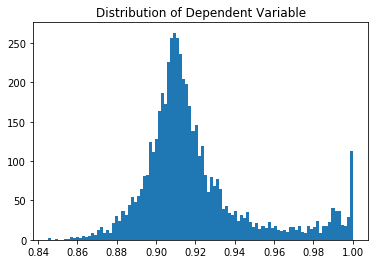

In [5]:
# Explore distribution of target
plt.hist(train['Target'], bins = 100)
plt.title("Distribution of Dependent Variable")
plt.show()

In [6]:
# Split training set into X and y (removing first column containing IDs)
X_train = train.iloc[:, 1:-1]
y_train = train.iloc[:, -1]

In [7]:
# Remove first column to make predictions
X_test = test.iloc[:, 1:]
X_test.head()

,Feat 1,Feat 2,Feat 3,Feat 4,Feat 5,Feat 6,Feat 7,Feat 8,Feat 9,Feat 10,...,Feat 242,Feat 243,Feat 244,Feat 245,Feat 246,Feat 247,Feat 248,Feat 249,Feat 250,Feat 251
0,0.999849,0.174118,0.999819,0.997841,0.133333,0.2,0.0,0.0,0.000000,0.000000,...,0.0,0.0,0.0,0,0.728471,0.054397,0.649,0.416164,0.053998,0.667391
1,0.999958,0.164706,1.000000,0.996741,0.066667,0.0,0.0,0.0,0.000000,0.000000,...,0.0,0.0,0.0,0,0.497255,0.037736,0.375,0.165514,0.101973,0.506650
2,0.999666,0.174118,0.999479,0.997376,0.000000,0.0,0.0,0.0,0.000000,0.000000,...,0.0,0.0,0.0,0,0.688941,0.019309,1.000,0.192069,0.120700,0.498784
3,0.999735,0.174118,0.999655,0.997173,0.133333,0.0,0.0,0.0,0.363636,0.166667,...,0.0,0.0,0.0,0,0.654118,0.019089,0.333,0.451252,0.164180,0.774466
4,0.999806,0.164706,0.999551,0.997234,0.000000,0.0,0.0,0.0,0.000000,0.000000,...,0.0,0.0,0.0,0,0.627451,0.160433,0.882,0.147407,0.000000,0.481240


In [8]:
# Define function to compute RMSE
def scoreRMSE(predictor, X, true_y):
    predictions = predictor.predict(X)
    return np.sqrt(mean_squared_error(predictions, true_y))

## Neural Network

In [9]:
# https://machinelearningmastery.com/tutorial-first-neural-network-python-keras/
# https://stats.stackexchange.com/questions/350718/confused-in-selecting-the-number-of-hidden-layers-and-neurons-in-an-mlp-for-a-bi
# attempt at neural network
from keras.constraints import maxnorm
from keras import regularizers
from keras.layers.normalization import BatchNormalization
from keras.layers import Activation, Dropout

In [10]:
def run_models(seeds):
    predictions_all = [[] for x in range(len(seeds))]
    for s in range(len(seeds)):
        np.random.seed(seeds[s])
        model = Sequential()
        model.add(Dense(376, input_dim=251, kernel_initializer = 'normal', activation = 'relu'))
        model.add(Dense(128, kernel_initializer = 'normal', activation = 'relu'))
        model.add(Dropout(0.2))
        model.add(Dense(64, kernel_initializer = 'normal', activation = 'relu'))
        model.add(Dropout(0.3))
        model.add(Dense(16, kernel_initializer = 'normal', activation = 'relu'))
        model.add(Dropout(0.2))
        model.add(Dense(1, kernel_initializer = 'normal', activation='sigmoid'))
        
        model.compile(loss='mean_squared_error', optimizer='adam', metrics=['accuracy'])
        
        # https://datascience.stackexchange.com/questions/18414/are-there-any-rules-for-choosing-the-size-of-a-mini-batch
        history = model.fit(X_train, y_train, validation_split=0.2, epochs=50, batch_size=64,  verbose=2)
        
        # https://machinelearningmastery.com/display-deep-learning-model-training-history-in-keras/
        plt.clf()
        plt.plot(np.log(history.history['loss']))
        plt.plot(np.log(history.history['val_loss']))
        plt.title('model loss with seed' + str(seeds[s]))
        plt.ylabel('log(loss)')
        plt.xlabel('epoch')
        plt.legend(['train', 'test'], loc='upper left')
        plt.show()
        predictions = model.predict(X_test)
        predictions_all[s] = predictions
    return predictions_all

Train on 4264 samples, validate on 1067 samples
Epoch 1/50
 - 3s - loss: 0.0655 - acc: 4.6904e-04 - val_loss: 0.0070 - val_acc: 0.0000e+00
Epoch 2/50
 - 1s - loss: 0.0061 - acc: 4.6904e-04 - val_loss: 0.0017 - val_acc: 0.0000e+00
Epoch 3/50
 - 1s - loss: 0.0036 - acc: 4.6904e-04 - val_loss: 0.0018 - val_acc: 0.0000e+00
Epoch 4/50
 - 1s - loss: 0.0027 - acc: 4.6904e-04 - val_loss: 0.0019 - val_acc: 0.0000e+00
Epoch 5/50
 - 1s - loss: 0.0025 - acc: 4.6904e-04 - val_loss: 0.0012 - val_acc: 0.0000e+00
Epoch 6/50
 - 1s - loss: 0.0024 - acc: 4.6904e-04 - val_loss: 8.0172e-04 - val_acc: 0.0000e+00
Epoch 7/50
 - 1s - loss: 0.0022 - acc: 4.6904e-04 - val_loss: 0.0011 - val_acc: 0.0000e+00
Epoch 8/50
 - 1s - loss: 0.0022 - acc: 4.6904e-04 - val_loss: 0.0011 - val_acc: 0.0000e+00
Epoch 9/50
 - 1s - loss: 0.0021 - acc: 4.6904e-04 - val_loss: 9.6014e-04 - val_acc: 0.0000e+00
Epoch 10/50
 - 1s - loss: 0.0021 - acc: 4.6904e-04 - val_loss: 8.4876e-04 - val_acc: 0.0000e+00
Epoch 11/50
 - 1s - loss: 0.0

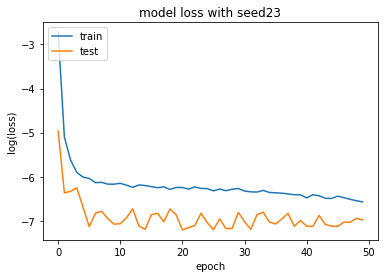

Train on 4264 samples, validate on 1067 samples
Epoch 1/50
 - 3s - loss: 0.0488 - acc: 4.6904e-04 - val_loss: 0.0070 - val_acc: 0.0000e+00
Epoch 2/50
 - 1s - loss: 0.0057 - acc: 4.6904e-04 - val_loss: 0.0013 - val_acc: 0.0000e+00
Epoch 3/50
 - 1s - loss: 0.0031 - acc: 4.6904e-04 - val_loss: 0.0012 - val_acc: 0.0000e+00
Epoch 4/50
 - 1s - loss: 0.0024 - acc: 4.6904e-04 - val_loss: 0.0010 - val_acc: 0.0000e+00
Epoch 5/50
 - 1s - loss: 0.0021 - acc: 4.6904e-04 - val_loss: 9.9141e-04 - val_acc: 0.0000e+00
Epoch 6/50
 - 1s - loss: 0.0020 - acc: 4.6904e-04 - val_loss: 9.2913e-04 - val_acc: 0.0000e+00
Epoch 7/50
 - 1s - loss: 0.0019 - acc: 4.6904e-04 - val_loss: 0.0014 - val_acc: 0.0000e+00
Epoch 8/50
 - 1s - loss: 0.0019 - acc: 4.6904e-04 - val_loss: 8.1093e-04 - val_acc: 0.0000e+00
Epoch 9/50
 - 1s - loss: 0.0019 - acc: 4.6904e-04 - val_loss: 8.0272e-04 - val_acc: 0.0000e+00
Epoch 10/50
 - 1s - loss: 0.0019 - acc: 4.6904e-04 - val_loss: 9.2108e-04 - val_acc: 0.0000e+00
Epoch 11/50
 - 1s - l

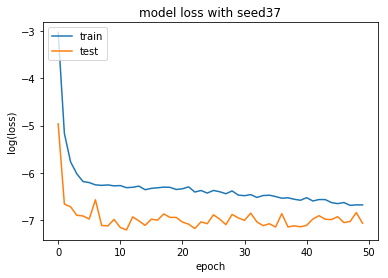

Train on 4264 samples, validate on 1067 samples
Epoch 1/50
 - 3s - loss: 0.0549 - acc: 4.6904e-04 - val_loss: 0.0068 - val_acc: 0.0000e+00
Epoch 2/50
 - 1s - loss: 0.0049 - acc: 4.6904e-04 - val_loss: 0.0020 - val_acc: 0.0000e+00
Epoch 3/50
 - 1s - loss: 0.0029 - acc: 4.6904e-04 - val_loss: 0.0012 - val_acc: 0.0000e+00
Epoch 4/50
 - 1s - loss: 0.0025 - acc: 4.6904e-04 - val_loss: 9.0295e-04 - val_acc: 0.0000e+00
Epoch 5/50
 - 1s - loss: 0.0023 - acc: 4.6904e-04 - val_loss: 9.8676e-04 - val_acc: 0.0000e+00
Epoch 6/50
 - 1s - loss: 0.0023 - acc: 4.6904e-04 - val_loss: 8.2347e-04 - val_acc: 0.0000e+00
Epoch 7/50
 - 1s - loss: 0.0021 - acc: 4.6904e-04 - val_loss: 9.6429e-04 - val_acc: 0.0000e+00
Epoch 8/50
 - 1s - loss: 0.0021 - acc: 4.6904e-04 - val_loss: 0.0010 - val_acc: 0.0000e+00
Epoch 9/50
 - 1s - loss: 0.0021 - acc: 4.6904e-04 - val_loss: 0.0010 - val_acc: 0.0000e+00
Epoch 10/50
 - 1s - loss: 0.0021 - acc: 4.6904e-04 - val_loss: 8.6348e-04 - val_acc: 0.0000e+00
Epoch 11/50
 - 1s - l

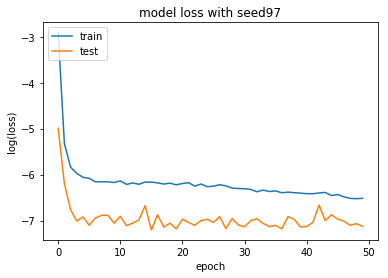

NameError: name 'label' is not defined

In [11]:
# predict NN
predictions_all = run_models([23, 37, 97])
predictions = np.mean(predictions_all, axis=0)

# Format predictions to be compatible with Kaggle upload
sample_submission = pd.DataFrame(data=predictions, columns=['Predicted'])
sample_submission.insert(0, "Id", range(1, 1 + X_test.shape[0]))
sample_submission['Id'] = sample_submission['Id'].astype(str)
sample_submission.head()

# Save predictions to .csv file for upload to Kaggle
sample_submission.to_csv("NN_submission.csv".format(label), index=False)

## Ridge, Lasso, Elastic Net

In [13]:
# tuning alpha via cross validation for each linear model
def cross_validation(functions_opt, functions, alphas_vals, labels):
    scores = []
    alphas_opt = []
    
    predictions_all = [[] for x in range(len(functions))]
    
    for index in range(len(functions)):
        reg = functions_opt[index](alphas = alphas_vals, cv=10).fit(X_train, y_train)
        alphas_opt.append(reg.alpha_)
        print(reg.alpha_)
        reg_opt = functions[index](alpha=reg.alpha_).fit(X_train, y_train)
        predict = reg_opt.predict(X_test)
        predictions_all[index] = predict
    
    print (alphas_opt)
    return predictions_all

In [14]:
predictions_all = cross_validation([RidgeCV, LassoCV, ElasticNetCV], 
                                   [Ridge, Lasso, ElasticNet], 
                                   np.linspace(0.01,100,200), 
                                   ['ridge', 'lasso', 'elasticnet'])
predictions = np.mean(predictions_all, axis=0)

15.083869346733666
100.0
100.0
[15.083869346733666, 100.0, 100.0]


In [15]:
# attempting to plot performance
def plot_performance(functions, alpha_vals, labels):
    scores =[[] for x in range(len(functions))]
    predictions_all = [[] for x in range(len(functions))]
    
    for alpha_val in alpha_vals:
        for index in range(len(functions)):
            reg = functions[index](alpha=alpha_val).fit(X_train, y_train)
            predict = reg.predict(X_test)
            predictions_all[index] = predict
            score = scoreRMSE(reg, X_train, y_train)
            scores[index].append(score)
            
    plt.clf()
    for loss in scores:
        plt.plot(alpha_vals, loss)
    plt.legend(labels, loc='bottom left')
    plt.show()
    return predictions_all

/Users/hurlink/anaconda3/lib/python3.6/site-packages/matplotlib/legend.py:638: UserWarning: Unrecognized location "bottom left". Falling back on "best"; valid locations are
	best
	upper right
	upper left
	lower left
	lower right
	right
	center left
	center right
	lower center
	upper center
	center

  % (loc, '\n\t'.join(self.codes)))


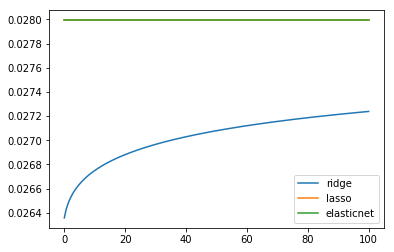

[array([0.92555485, 0.9171508 , 0.92235886, ..., 0.91985758, 0.91910861,
        0.91851649]),
 array([0.91965695, 0.91965695, 0.91965695, ..., 0.91965695, 0.91965695,
        0.91965695]),
 array([0.91965695, 0.91965695, 0.91965695, ..., 0.91965695, 0.91965695,
        0.91965695])]

In [16]:
plot_performance([Ridge, Lasso, ElasticNet], np.linspace(0.01,100,200), ['ridge', 'lasso', 'elasticnet'])

In [21]:
def predict_and_output(model, label):
    
    model.fit(X_train, y_train)
    
    # Make predictions with our model
    predictions = model.predict(X_test)
    
    # Format predictions to be compatible with Kaggle upload
    sample_submission = pd.DataFrame(data=predictions, columns=['Predicted'])
    sample_submission.insert(0, "Id", range(1, 1 + X_test.shape[0]))
    sample_submission['Id'] = sample_submission['Id'].astype(str)
    sample_submission.head()
    
    # Save predictions to .csv file for upload to Kaggle
    sample_submission.to_csv("{}_submission.csv".format(label), index=False)
    
    print (scoreRMSE(model, X_train, y_train))

In [22]:
predict_and_output(Ridge(alpha=15.083869346733666), "ridge")
predict_and_output(Lasso(alpha=100), "lasso")
predict_and_output(ElasticNet(alpha=100), "elastic_net")

0.02682553815336854
0.027992344309222986
0.027992344309222986
